In [1]:
%matplotlib inline
from dataset import Dataset
training_set = Dataset('memorability/training_set')
test_set = Dataset('memorability/test_set')

Number of images in the training set:1555
Number of images in the test set:667
Total number of images:2222
('List of classes ', ['.DS_Store', 'Images'])


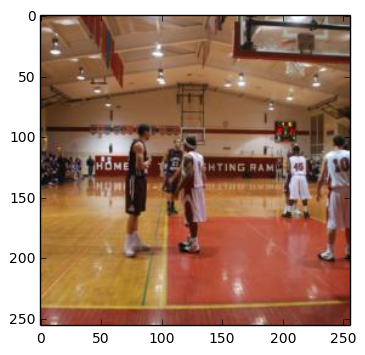

Shown image path: memorability/training_set/Images/0019.jpg


In [2]:
print ("Number of images in the training set:{0}".format(training_set.getLength()))
print ("Number of images in the test set:{0}".format(test_set.getLength()))
print ("Total number of images:{0}".format(training_set.getLength()+test_set.getLength()))
print ("List of classes ", training_set.getClasses())
training_set.showImage('Images',18)
print ("Shown image path: %s" % training_set.getImagePath('Images',18))

In [3]:
import numpy as np
training_hits=np.load('memorability/training_hits.npy')
test_hits=np.load('memorability/test_hits.npy')

print (training_hits.shape)
print (test_hits.shape)

(1555,)
(667,)


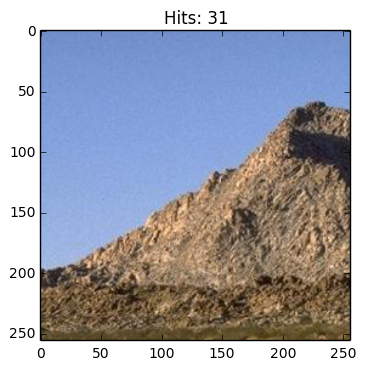

In [4]:
from skimage import io as sio
from matplotlib import pyplot as plt
im=sio.imread(training_set.getImagePath('Images',23))
plt.figure()
plt.imshow(im)
plt.title("Hits: {0}".format(training_hits[23]))
plt.show()

# 3.1

In [5]:
def show_all_images(dataset,data_hits):
    for i in range(dataset.getLength()):
        plt.figure()
        im=sio.imread(dataset.getImagePath('Images',i))
        plt.imshow(im)
        plt.title("Hits: {0}".format(data_hits[i]))
        plt.show()
        plt.pause(2)

# 3.2

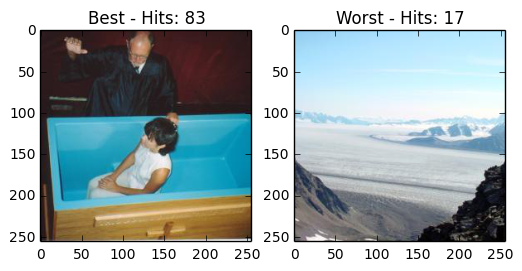

In [6]:
best = np.argmax(training_hits)
worst = np.argmin(training_hits)
imb=sio.imread(training_set.getImagePath('Images',best))
imw=sio.imread(training_set.getImagePath('Images',worst))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(imb)
plt.title("Best - Hits: {0}".format(training_hits[best]))
plt.subplot(1,2,2)
plt.imshow(imw)
plt.title("Worst - Hits: {0}".format(training_hits[worst]))
plt.show()

# 4.1

In [ ]:
from bovw import extract_features
training_local_features = extract_features(training_set)

from bovw import describe_dataset
from sklearn.cluster import MiniBatchKMeans as KMeans

kmeans = KMeans(500)
kmeans.fit(training_local_features)
training_features,_,_=describe_dataset(training_set,kmeans)
test_features,_,_=describe_dataset(test_set,kmeans)

from sklearn.preprocessing import Normalizer
norm = Normalizer(norm='l2')
training_features=norm.transform(training_features)
test_features=norm.transform(test_features)

X_training = training_features
y_training = training_targets["Images"]

X_test = test_features
y_test = test_targets["Images"]

import _pickle as cPickle

with open("memorability/features.pkl","wb") as f:
    cPickle.dump({
            "X_training" : X_training,
            "y_training" : y_training,
            "X_test" : X_test,
            "y_test" : y_test
        },f)



In [7]:
import cPickle

with open("memorability/features.pkl") as f:
    data = cPickle.load(f)

X_training = data["X_training"]
y_training = data["y_training"]
X_test = data["X_test"]
y_test = data["y_test"]
f.close()

In [8]:
print(X_training.shape)
print(X_test.shape)

(1555, 500)
(667, 500)


# 4.1
Che dimensioni hanno le matrici X_training e X_test? Questo tipo di matrice ha un nome particolare in machine learning, quale?

Le matrici hanno dimensione (1555,500) e (667,500) e sono dette design matrix, o matrice delle osservazioni

In [9]:
from sklearn.decomposition import PCA as PCA
pca = PCA()
pca.fit(X_training);

In [10]:
mu = pca.mean_
C = pca.components_

print (mu.shape)
print (C.shape)

(500,)
(500, 500)


In [11]:
W=np.dot((X_training-mu),np.linalg.inv(C))
print (W.shape)

(1555, 500)


In [12]:
X_training_pca = pca.transform(X_training)
X_test_pca = pca.transform(X_test)

print X_training.shape, X_training_pca.shape
print X_test.shape, X_test_pca.shape

(1555, 500) (1555, 500)
(667, 500) (667, 500)


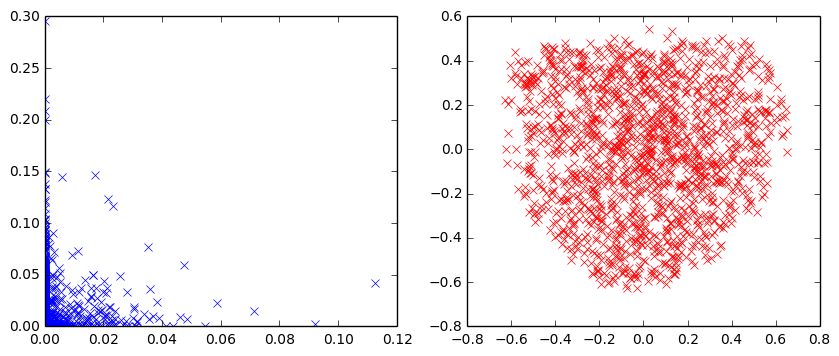

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(X_training[:,0],X_training[:,1],'bx')
plt.subplot(122)
plt.plot(X_training_pca[:,0],X_training_pca[:,1],'rx')

plt.show()

# 5.1 
Che differenze notate tra i due plot? Quale insieme appare “centrato” rispetto allo zero? Quale insieme sembra contenere meno ridondanza?

Il secondo plot è centrato rispetto all'origine e presenta un numero ridotto di ridondanze. Andando ad analizzare per tutte le immagini presenti nel mio training set e limitandomi solo alle prime due feature.

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_training_pca,y_training)

In [15]:
theta_0 = lr.intercept_
theta_1_500 = lr.coef_

print theta_0
print theta_1_500.shape

52.3009646302
(500,)


# 6.1
Perché il parametro θ0 viene chiamato "intercept_" all'interno del modello di regressione lineare?

perchè rappresenta il punto di intercetta tra la funzione che stiamo andando a generare e l'asse delle y(hits)

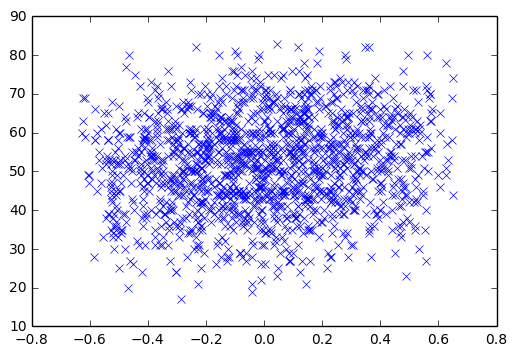

In [16]:
plt.figure()
X1 = X_training_pca[:,0]
plt.plot(X1,y_training,'x')
plt.show()

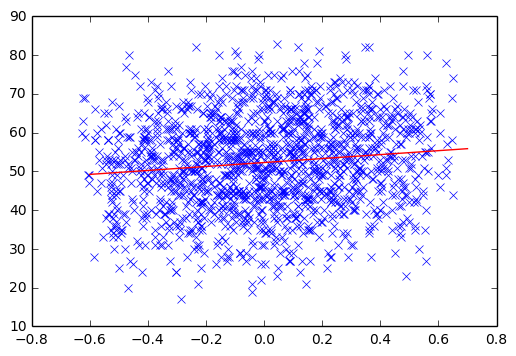

In [17]:
plt.figure()
plt.plot(X1,y_training,'x')
theta_1=theta_1_500[0]
x=np.arange(-0.6,0.8,0.1)
plt.plot(x,theta_0+x*theta_1,'r')
plt.show()

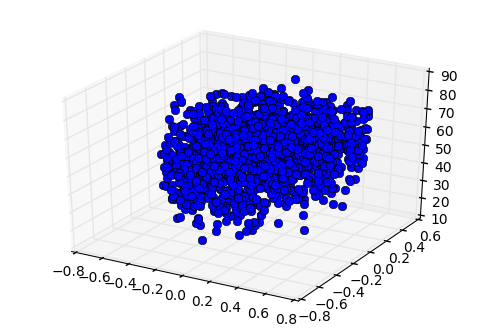

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.subplot(111, projection='3d')

X1 = X_training_pca[:,0]
X2 = X_training_pca[:,1]

plt.plot(X1,X2,y_training,'o')
plt.show()

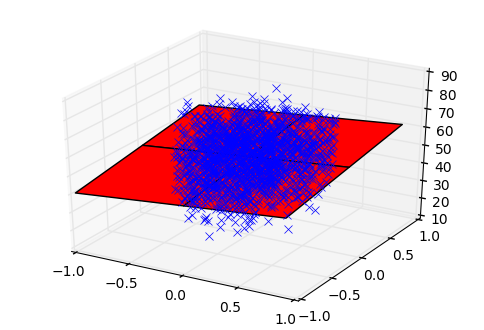

In [19]:
%matplotlib qt
fig = plt.figure()
plt.subplot(111, projection='3d')

theta_2 = theta_1_500[1]

x_range= np.arange(-1,1,0.1)
y_range= np.arange(-1,1,0.1)

x,y=np.meshgrid(x_range,y_range)

plt.plot(X1,X2,y_training,'x')
plt.gca().plot_surface(x,y,theta_0+theta_1*x+theta_2*y,shade=False,color='r')
plt.show()

# 6.2
la retta e il piano di regressione sono “ragionevoli” rispetto ai dati considerati? Quanto errore pensate che il regressore stia compiendo?

I valori segnati sembrano essere ragionevoli in quanto il piano interseca la nuvola di valori in una zona molto centrale anche se l'errore sembra notevole

In [ ]:
%matplotlib qt
fig = plt.figure()
plt.subplot(111, projection='3d')

X1 = X_test_pca[:,0]
X2 = X_test_pca[:,1]

plt.plot(X1,X2,y_test,'o')
plt.show()

In [ ]:
%matplotlib qt
fig = plt.figure()
plt.subplot(111, projection='3d')

theta_2 = theta_1_500[1]

x_range= np.arange(-1,1,0.1)
y_range= np.arange(-1,1,0.1)

x,y=np.meshgrid(x_range,y_range)

plt.plot(X1,X2,y_test,'x')
plt.gca().plot_surface(x,y,theta_0+theta_1*x+theta_2*y,shade=False,color='r')
plt.show()

In [ ]:
training_predictions = lr.predict(X_training_pca)
test_predictions = lr.predict(X_test_pca)

In [ ]:
def predict_and_show(dataset,X_pca,lr,hits,idx):
    predictions = lr.predict(X_pca)
    plt.figure()
    im=sio.imread(dataset.getImagePath('Images',idx))
    plt.imshow(im)
    plt.title("Hits: {0} - Predicted: {1}".format(hits[idx],predictions[idx]))
    plt.show()

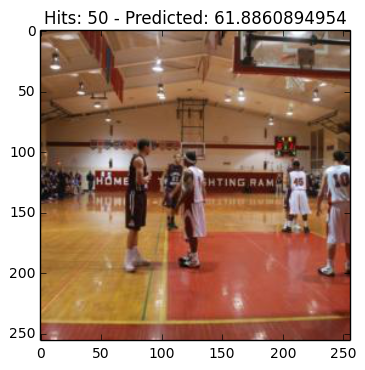

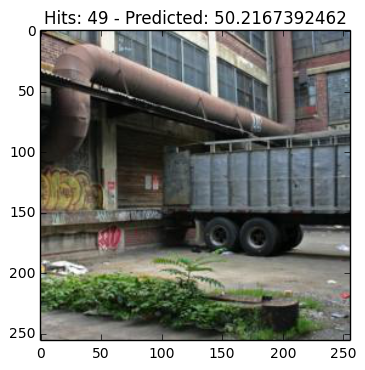

In [47]:
%matplotlib inline
predict_and_show(training_set,X_training_pca,lr,y_test,18)
predict_and_show(test_set,X_test_pca,lr,y_test,10)

In [39]:
def MAE(X_pca,lr,hits):
    total=0
    predictions = lr.predict(X_pca)
    for i in range (X_pca.shape[0]):
        total += abs(hits[i]-predictions[i])
    return total/X_pca.shape[0]

In [43]:
print MAE(X_training_pca,lr,y_training)
print MAE(X_test_pca,lr,y_test)

7.26709775455
10.3583275731


In [68]:
import scipy
coef = scipy.stats.spearmanr(X_training_pca)

In [69]:
coef[0].shape

(500, 500)